# Eksploracja danych

Przydatny link:
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Definicja ścieżek:

In [3]:
deliveries_path = "../data/raw/deliveries.jsonl"
products_path = "../data/raw/products.jsonl"
sessions_path = "../data/raw/sessions.jsonl"
users_path = "../data/raw/users.jsonl"

In [71]:
deliveries_data = pd.read_json(deliveries_path, lines=True)
products_data = pd.read_json(products_path, lines=True)
sessions_data = pd.read_json(sessions_path, lines=True)
users_data = pd.read_json(users_path, lines=True)

#### Dane surowe:

In [94]:
data = sessions_data
data['timestamp_week'] = data['timestamp'].apply(lambda x: x.week)
data['timestamp_quarter'] = data['timestamp'].apply(lambda x: x.quarter)
data['timestamp_date'] = data['timestamp'].apply(lambda x: x.date())

In [95]:
data.sort_values(by=['timestamp'])

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,timestamp_week,timestamp_quarter,timestamp_date
5462,1615,2021-01-08 17:29:37,139,1032,VIEW_PRODUCT,10,NaN,1,1,2021-01-08
5463,1615,2021-01-08 17:32:51,139,1033,VIEW_PRODUCT,10,NaN,1,1,2021-01-08
5464,1615,2021-01-08 17:35:32,139,1033,BUY_PRODUCT,10,20833.0,1,1,2021-01-08
5544,1635,2021-01-10 05:56:20,139,1292,VIEW_PRODUCT,20,NaN,1,1,2021-01-10
5545,1635,2021-01-10 05:57:54,139,1291,VIEW_PRODUCT,20,NaN,1,1,2021-01-10
...,...,...,...,...,...,...,...,...,...,...
12596,3603,2021-12-10 11:21:21,200,1041,VIEW_PRODUCT,20,NaN,49,4,2021-12-10
12597,3603,2021-12-10 11:23:13,200,1047,VIEW_PRODUCT,20,NaN,49,4,2021-12-10
12598,3603,2021-12-10 11:26:10,200,1040,VIEW_PRODUCT,20,NaN,49,4,2021-12-10
12599,3603,2021-12-10 11:26:46,200,1040,BUY_PRODUCT,20,21867.0,49,4,2021-12-10


Podział na zbiór testowy i treningowy ze względu na kwartały

In [103]:
train_data = data[data.timestamp_quarter < 4]
test_data = data[data.timestamp_quarter == 4]


Ilość zdarzeń w sesji na dzień - wykres

<AxesSubplot:>

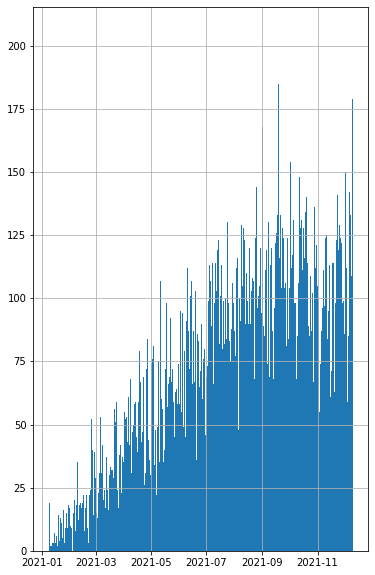

In [98]:
data['timestamp_date'].hist(bins=len(data['timestamp_date'].value_counts()))

Typy danych

In [25]:
data.dtypes

product_id         int64
product_name      object
category_path     object
price            float64
dtype: object

Kolumny

In [26]:
data.columns

Index(['product_id', 'product_name', 'category_path', 'price'], dtype='object')

**Kolumna do znalezienia**

Licza danych nullowalnych

In [28]:
pd.isna(data).sum()

product_id       0
product_name     0
category_path    0
price            0
dtype: int64

Konwersja typów dla z *int64* do *float64*

In [29]:
for int_column in data.select_dtypes("int64").columns:
    data[int_column] = data[int_column].astype("float64")

Wykres pudełkowy

<AxesSubplot:>

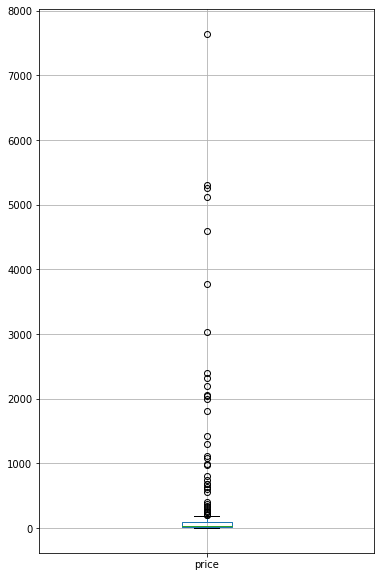

In [40]:
products_data.boxplot('price')

Histogramy

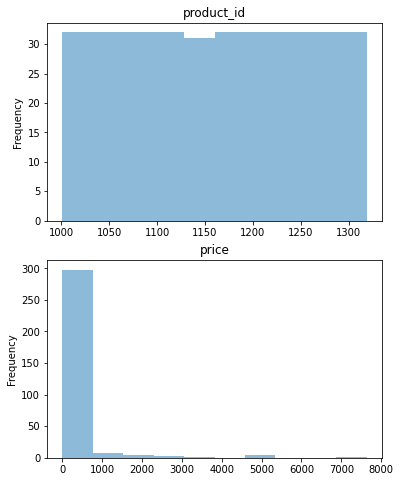

In [31]:
float_columns_names = data.select_dtypes("float").columns
plt.rcParams['figure.figsize'][0] = 6.0
plt.rcParams['figure.figsize'][1] = 4.0 * len(float_columns_names)
figure, axes = plt.subplots(len(float_columns_names), 1)
for i, column_name in enumerate(float_columns_names):
#     print(train_data[column_name].value_counts())
    data[column_name].plot.hist(ax = axes[i], alpha=0.5, title=column_name)

Heksbin-y (histogramy w 2D)

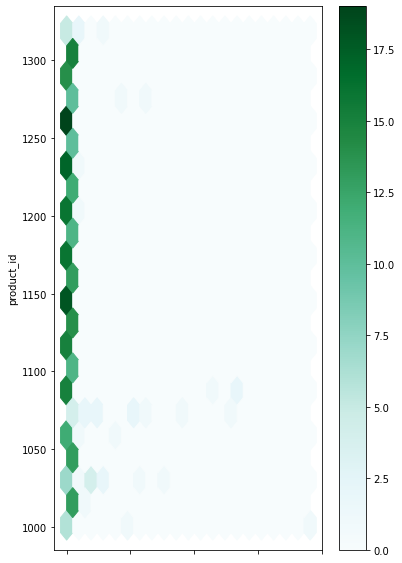

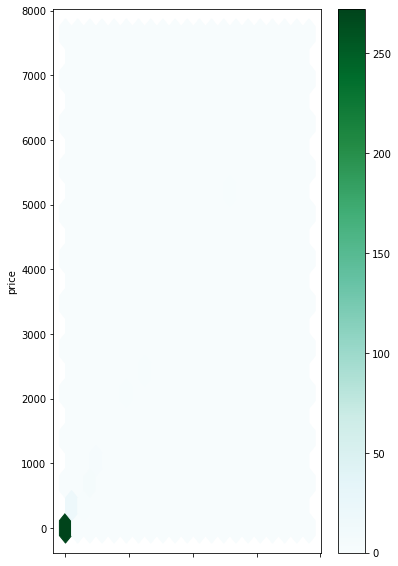

In [34]:
float_columns_names = data.select_dtypes("float").columns
# plt.rcParams['figure.figsize'][0] = 10.0
plt.rcParams['figure.figsize'][1] = 10.0
# figure, axes = plt.subplots(len(float_columns_names), 1)
for i, column_name in enumerate(float_columns_names):
#     print(train_data[column_name].value_counts())
    data.plot.hexbin(x = 'price', y = column_name, gridsize = 20)

In [33]:
object_columns_names = data.select_dtypes("object").columns
for name in object_columns_names:
    print(data[name].value_counts())

Telefon Siemens Gigaset DA310            1
Need for Speed Shift 2 Unleashed (PC)    1
LEGO Władca Pierścieni (PC)              1
Hitman Krwawa Forsa (PC)                 1
Damnation (PC)                           1
                                        ..
Overlord (PC)                            1
Battlefield 3 Close Quarters (PC)        1
Anomaly Warzone Earth (PC)               1
Symulator Śmieciarki (PC)                1
HTC HS-S200                              1
Name: product_name, Length: 319, dtype: int64
Gry i konsole;Gry komputerowe                                        202
Gry i konsole;Gry na konsole;Gry Xbox 360                             32
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Komputery;Monitory;Monitory LCD                                       17
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Telefony i akcesoria;Akcesoria telefoniczne

# Pytania
- w jakiej formie będziemy dostawać dane na produkcji